# Text Classifier

In [1]:
setwd("/Users/bakaibaiazbekov/Documents/unsorted")

In [2]:
#install.packages('tidyverse')
library(tidyverse)
#library(stringdist)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load Datasets

In [3]:
# You can read either way via xls or csv. For convinence I use csv format since R reads much faster but if you don't have huge datasets, it is also simple to use readxl package. 

install.packages("readxl") # CRAN version
library(readxl) # load library

# read_excel reads both xls and xlsx files
output <- read_excel("output.xls")
unsorted <- read_excel("unsorted.xls")
clu5 <- read_excel("clu5.xls")

head(output)
head(unsorted)




The downloaded binary packages are in
	/var/folders/d5/g3x3m16j4g77jkr7m0s_qgtm0000gn/T//RtmpqEvPk2/downloaded_packages


ERROR: Error: `path` does not exist: ‘output.xls’


In [4]:
output <- read_csv2("output-Table 1.csv") 
unsorted <- read_csv2("unsorted-Table 1.csv")
clu5 <- read_csv2("clu5 top labels-Table 1.csv")

head(output)
head(unsorted)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  dim1 = col_double(),
  dim2 = col_double(),
  CLU15 = col_double(),
  CLU14 = col_double(),
  CLU13 = col_double(),
  CLU12 = col_double(),
  CLU11 = col_double(),
  CLU10 = col_double(),
  CLU9 = col_double(),
  CLU8 = col_double(),
  CLU7 = col_double(),
  CLU6 = col_double(),
  CLU5 = col_double(),
  item_num = col_double(),
  item_text = col_character()
)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Warning message:
“Missing column names filled in: 'X3' [3], 'X4' [4], 'X5' [5]”
Parsed with column specification:
cols(
  unsorted_id = col_character(),
  unsorted_content = col_character(),
  X3 = col_logical(),
  X4 = col_logical(),
  X5 = col_logical()
)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Label ID` = col_double(),
  `Label text` = c

dim1,dim2,CLU15,CLU14,CLU13,CLU12,CLU11,CLU10,CLU9,CLU8,CLU7,CLU6,CLU5,item_num,item_text
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.16485037,-0.6427448,1,1,1,1,1,1,1,1,1,1,1,1,1. Challenge the audience to question their practice
0.32164576,0.7572175,2,2,2,2,2,2,2,2,2,2,2,2,"2. Cover novel therapies, techniques, and concepts"
0.52631264,-0.1798007,3,3,3,3,3,3,3,3,3,3,3,3,3. Provide a forum for topics of health and education that are relevant to this organization and to the community at large.
-0.06026326,-0.4164893,1,1,1,1,1,1,1,1,1,1,1,4,4. Presentations in which clinical issues are discussed in a case presentation format by specialists and allowing for the opportunity for comments and questions.
-0.50168592,0.6736931,4,4,4,4,4,4,4,4,4,4,4,5,5. Cover areas from this organization's strategic plan.
0.10648422,0.5826680,2,2,2,2,2,2,2,2,2,2,2,6,"6. Present speakers and ideas that are ""out of the box"" such as the recent one about the beauty of patients with chronic medical problems."


unsorted_id,unsorted_content,X3,X4,X5
<chr>,<chr>,<lgl>,<lgl>,<lgl>
41,Be interesting and easy to learn from.,NA,NA,NA
93,Give quality lectures,NA,NA,NA
59,Have an engaging speaker.,NA,NA,NA
122,Bring national figures to present,NA,NA,NA
139,Get national and international speaker/experts,NA,NA,NA
160,Include some of the best speakers in the country,NA,NA,NA


In [5]:
output$dim1 <- round(output$dim1, 4)
output$dim2 <- round(output$dim2, 4)

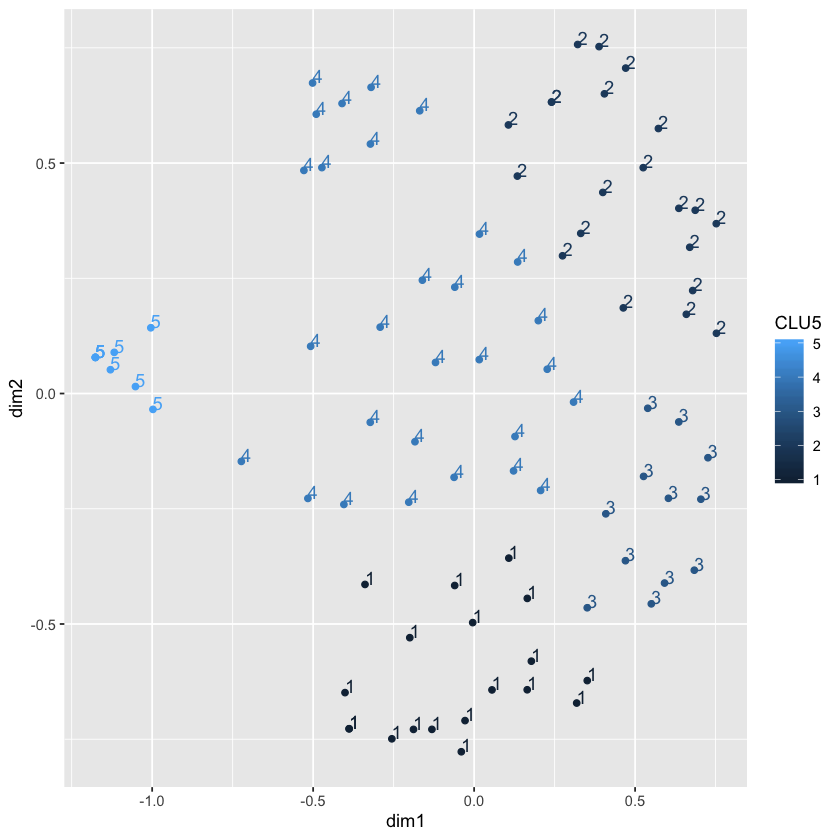

In [6]:
ggplot(output,aes(x = dim1, y = dim2, color = CLU5, label = CLU5)) + geom_point() + geom_text(aes(label=CLU5),hjust=0, vjust=0)

In [7]:
#install.packages(c('tm', 'SnowballC','NLP'))
library(tm)
library(SnowballC)
library(NLP)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




In [8]:
str(unsorted$unsorted_content)

 chr [1:81] "Be interesting and easy to learn from." ...


# Pre-processing the Data

In [9]:
# Create corpus
 
corpus = VCorpus(VectorSource(unsorted$unsorted_content))
# corpus$content

In [10]:
strwrap(corpus[[1]])

[1] "Be interesting and easy to learn from."

In [11]:
# Convert to lower-case

corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, stripWhitespace)

In [12]:
strwrap(corpus[[1]])

[1] "be interesting and easy to learn from"

In [13]:
# Remove stopwords

corpus = tm_map(corpus, removeWords, stopwords("english"))

strwrap(corpus[[1]])


[1] "interesting easy learn"

# Clustering Unsupervised Analysis

In [14]:
mat <- DocumentTermMatrix(corpus)
mat

<<DocumentTermMatrix (documents: 81, terms: 271)>>
Non-/sparse entries: 474/21477
Sparsity           : 98%
Maximal term length: 26
Weighting          : term frequency (tf)

In [92]:
# look at matrix
inspect(mat)

<<DocumentTermMatrix (documents: 81, terms: 271)>>
Non-/sparse entries: 474/21477
Sparsity           : 98%
Maximal term length: 26
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs clinical clinicians include information practice present provide relevant
  23        0          1       1           1        0       0       0        0
  26        0          0       0           1        1       0       0        0
  31        0          0       0           0        0       1       0        0
  35        0          0       0           0        0       0       0        0
  36        1          1       0           0        0       0       0        0
  41        1          0       0           1        1       0       1        0
  48        0          0       0           1        1       0       0        0
  50        0          0       0           0        0       1       0        0
  54        0          0       0           0        1       0       0        0
  79   

In [93]:
# check for sparsity
findFreqTerms(frequencies_unsorted, lowfreq = 10)

[1] "clinic"    "clinician" "practic"   "present"   "provid"    "research" 
[7] "topic"

In [94]:
# Remove sparse terms

sparse_unsorted <- removeSparseTerms(frequencies_unsorted, 0.995)
sparse_unsorted

<<DocumentTermMatrix (documents: 81, terms: 234)>>
Non-/sparse entries: 465/18489
Sparsity           : 98%
Maximal term length: 24
Weighting          : term frequency (tf)

In [95]:
# convert to data frame
unsorted_sparse <- as.data.frame(as.matrix(sparse_unsorted))
head(unsorted_sparse)

,access,accessattend,address,adult,advanc,affect,amount,applic,approach,appropri,⋯,unclear,updat,use,varieti,way,well,wellknown,wide,will,work
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [96]:
colnames(unsorted_sparse) <- make.names(colnames(unsorted_sparse))

In [97]:
head(unsorted_sparse)

,access,accessattend,address,adult,advanc,affect,amount,applic,approach,appropri,⋯,unclear,updat,use,varieti,way,well,wellknown,wide,will,work
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [15]:
mat4 <- weightTfIdf(mat)
mat4 <- as.matrix(mat4)
mat4

,access,accessattend,accessible,address,adult,advance,affects,amount,applicable,approach,⋯,updated,use,variety,way,well,wellknown,wide,widely,will,work
1,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
2,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
3,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
4,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
5,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
6,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
7,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
8,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,1.584963,0,0.0000000,0,0
9,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
10,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0


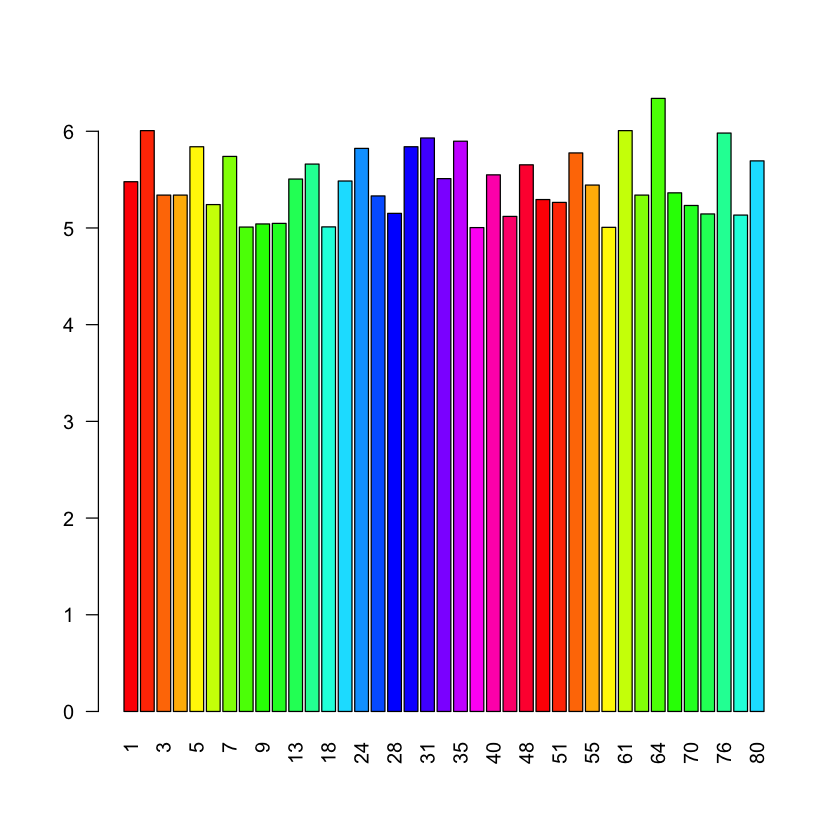

In [16]:
freq <- rowSums(mat4)
freq <- subset(freq, freq >= 5)
barplot(freq, las = 2, col = rainbow(25))

## K-Means Clustering

In [17]:
#install.packages('proxy')

In [18]:
dist.matrix = proxy::dist(mat4, method = "cosine") 

In [19]:
norm_eucl <- function(m){
    m/apply(m,1,function(x) sum(x^2)^.5)
}
mat_norm <- norm_eucl(mat4)

In [20]:
set.seed(5)
k <- 5 # number of cluster groups
kmeansResult <- kmeans(mat_norm, k)
kmeansResult
head(kmeansResult$cluster)

K-means clustering with 5 clusters of sizes 6, 7, 5, 58, 5

Cluster means:
       access accessattend  accessible   address       adult     advance
1 0.000000000   0.00000000 0.000000000 0.0000000 0.000000000 0.000000000
2 0.000000000   0.00000000 0.055454741 0.0000000 0.000000000 0.000000000
3 0.000000000   0.00000000 0.000000000 0.0000000 0.000000000 0.000000000
4 0.005045057   0.01318707 0.008374697 0.0278994 0.005045057 0.005864907
5 0.000000000   0.00000000 0.000000000 0.0000000 0.000000000 0.000000000
     affects      amount applicable    approach appropriate        area
1 0.00000000 0.000000000 0.00000000 0.000000000 0.000000000 0.000000000
2 0.00000000 0.000000000 0.00000000 0.000000000 0.000000000 0.000000000
3 0.00000000 0.000000000 0.00000000 0.000000000 0.000000000 0.000000000
4 0.00000000 0.009735746 0.01995729 0.004772354 0.005191141 0.007293644
5 0.06982849 0.000000000 0.00000000 0.000000000 0.000000000 0.000000000
  attendings   attract  attractive   audience  auditori

1 2 3 4 5 6 
4 4 4 4 4 4

In [21]:
summary(kmeansResult$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   4.000   3.605   4.000   5.000 

In [22]:
points <- cmdscale(dist.matrix, k = 2) 

## Kmeans Clustering Plot

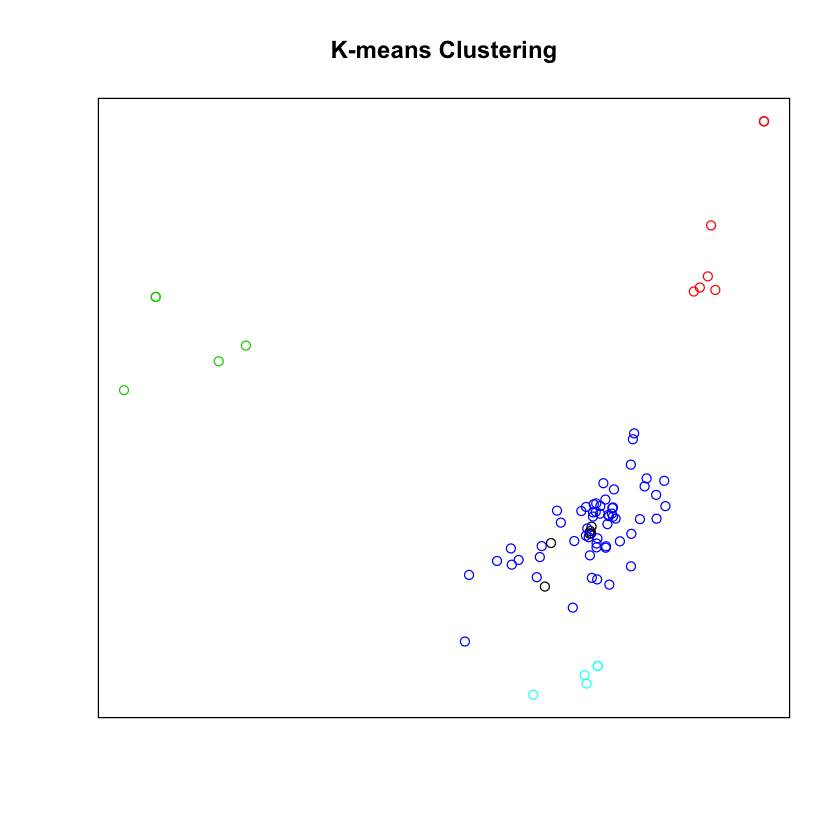

In [23]:
plot(points,col = as.factor(kmeansResult$cluster), main = 'K-means Clustering',mai = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), 
     xaxt = 'n', yaxt = 'n', xlab = '', ylab = '')

## Hierarchical Clustering

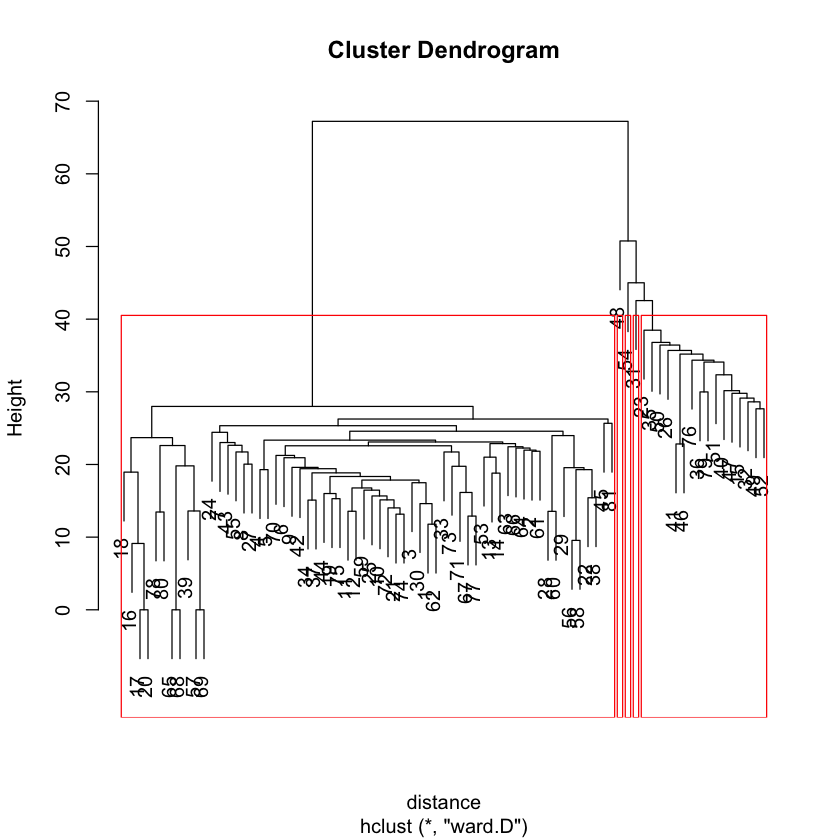

In [24]:
distance <- dist(scale(mat4))
#print(distance, digits = 2)
hc <- hclust(distance, method = "ward.D")
plot(hc)
rect.hclust(hc, k = 5)

In [25]:
result <- data.frame('actual' = unsorted$unsorted_content, 'predicted' = kmeansResult$cluster)
head(result)

,actual,predicted
,<fct>,<int>
1,Be interesting and easy to learn from.,4
2,Give quality lectures,4
3,Have an engaging speaker.,4
4,Bring national figures to present,4
5,Get national and international speaker/experts,4
6,Include some of the best speakers in the country,4


# Supervised Analysis

In [26]:
output_data <- output[, c(13, 15)]
head(output_data)

CLU5,item_text
<dbl>,<chr>
1,1. Challenge the audience to question their practice
2,"2. Cover novel therapies, techniques, and concepts"
3,3. Provide a forum for topics of health and education that are relevant to this organization and to the community at large.
1,4. Presentations in which clinical issues are discussed in a case presentation format by specialists and allowing for the opportunity for comments and questions.
4,5. Cover areas from this organization's strategic plan.
2,"6. Present speakers and ideas that are ""out of the box"" such as the recent one about the beauty of patients with chronic medical problems."


In [27]:
tail(output_data)

CLU5,item_text
<dbl>,<chr>
2,"85. Present state of the art clinical care - new findings, great projects demonstrating outcomes and important psychosocial / professional issues."
4,"86. Be free from political and/or organizational agendas or what senior management has determined to be the latest catch phrase, trend, or ""in"" thing."
1,"87. Stimulate the audience to make changes in their practice, for instance a recent grand rounds helped me to see that my usual cheery entrance into an exam room may threaten a sensitive patient"
1,88. Be accessible in offices
4,89. Cover topics that call for community and multidisciplinary involvement
4,"90. Identify colleagues involved in similar issue, practices, and projects."


## Pre-Process 

In [28]:
corpus_output <- VCorpus(VectorSource(output_data$item_text))

In [29]:
corpus_output <- tm_map(corpus_output, content_transformer(tolower))
corpus_output <- tm_map(corpus_output, removeNumbers)
corpus_output <- tm_map(corpus_output, removePunctuation)
corpus_output <- tm_map(corpus_output,stripWhitespace)
corpus_output <- tm_map(corpus_output, removeWords, stopwords('english'))
strwrap(corpus_output[[1]])

[1] "challenge audience question practice"

In [30]:
frequencies <- DocumentTermMatrix(corpus_output,
                                 control = list(tolower = TRUE,
                                            removeNumbers = TRUE,
                                            stopwords = TRUE,
                                            removePunctuation = TRUE,
                                            stemming = TRUE))
frequencies

<<DocumentTermMatrix (documents: 90, terms: 356)>>
Non-/sparse entries: 666/31374
Sparsity           : 98%
Maximal term length: 18
Weighting          : term frequency (tf)

## Word Cloud

In [89]:
wc_dm <- TermDocumentMatrix(corpus_output)

In [83]:
#install.packages('wordcloud')
#install.packages('RColorBrewer')
library(wordcloud)

In [90]:
wc <- as.matrix(wc_dm)
wc_sort <- sort(rowSums(wc), decreasing = TRUE)
wc_df <- data.frame(word= names(wc_sort), freq = wc_sort)

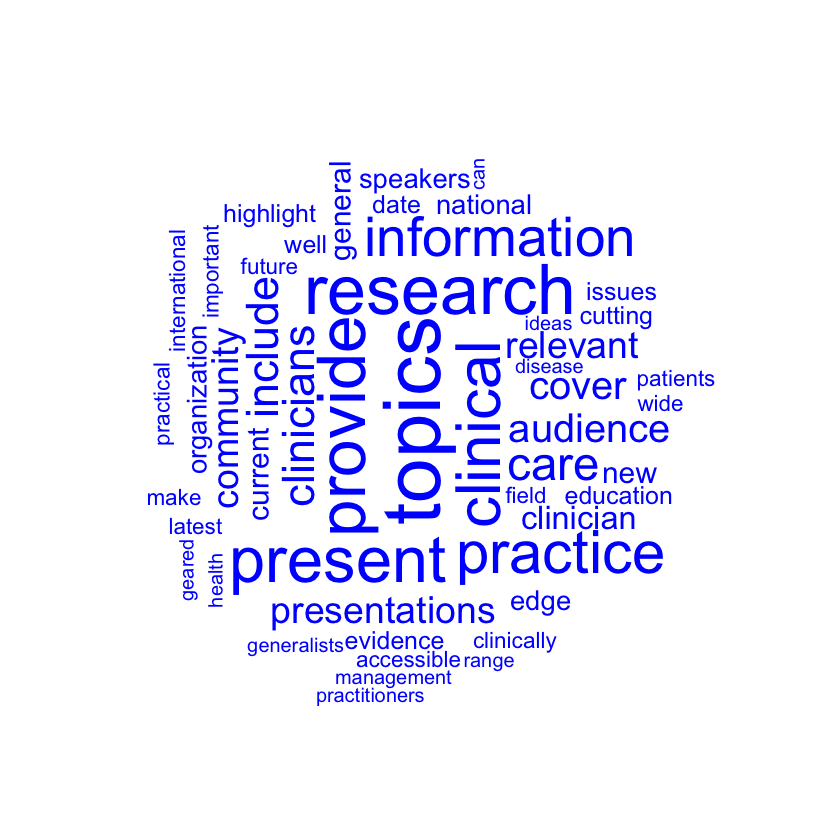

In [91]:
set.seed(1234)
wordcloud(words = wc_df$word, freq = wc_df$freq, min.freq = 1, max.words=50, random.order = FALSE, rot.per = 0.3, colors = "blue")

## Sparse

In [31]:
inspect(frequencies)

<<DocumentTermMatrix (documents: 90, terms: 356)>>
Non-/sparse entries: 666/31374
Sparsity           : 98%
Maximal term length: 18
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs care clinic clinician cover inform organ practic present provid topic
  10    0      1         0     0      0     0       0       0      0     0
  11    0      0         1     0      1     0       0       1      1     0
  39    2      1         0     0      0     0       0       0      0     1
  4     0      1         0     0      0     0       0       2      0     0
  41    0      0         2     0      0     0       0       0      0     0
  58    1      0         1     0      1     0       0       0      1     0
  83    1      0         1     0      0     0       0       0      1     0
  85    1      1         0     0      0     0       0       1      0     0
  86    0      0         0     0      0     0       0       0      0     0
  87    0      0         0     0      0     0  

In [32]:
findFreqTerms(frequencies, lowfreq = 10)

[1] "care"      "clinic"    "clinician" "inform"    "organ"     "practic"  
[7] "present"   "provid"    "topic"

So out of 356 words in our matrix only 9 words appear at least 10 times in our data. 
* the number of terms is an issue for 2 main reasons: 
    1. more terms means more independent variables, which means it takes longer to build our models. 
    2. The ration of independent variables to observations will affect how good the model will generelaize. 

In [33]:
sparse <- removeSparseTerms(frequencies, 0.995)
sparse

<<DocumentTermMatrix (documents: 90, terms: 356)>>
Non-/sparse entries: 666/31374
Sparsity           : 98%
Maximal term length: 18
Weighting          : term frequency (tf)

In [34]:
output_sparse <- as.data.frame(as.matrix(sparse))
head(output_sparse)

,academ,access,achiev,adopt,adult,advoc,agenda,agent,align,allow,⋯,well,whole,wide,will,work,world,worldrenown,worldwid,year,younger
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [35]:
colnames(output_sparse) <- make.names(colnames(output_sparse))

In [36]:
output_sparse$clusters <- as.factor(output$CLU5)
head(output_sparse)

,academ,access,achiev,adopt,adult,advoc,agenda,agent,align,allow,⋯,whole,wide,will,work,world,worldrenown,worldwid,year,younger,clusters
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2


## Split Data into Training & Testing 

In [37]:
#install.packages(c('caTools', 'rpart','rpart.plot'))

In [38]:
library(caTools)
library(rpart)
library(rpart.plot)

In [39]:
set.seed(123)
split <- sample.split(output_sparse$clusters, SplitRatio = 0.7)

trainSparse <- subset(output_sparse, split == TRUE)
testSparse <- subset(output_sparse, split == FALSE)

## Random Forest Classification

In [40]:
#install.packages('randomForest')
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [41]:
set.seed(123)

outputRF <- randomForest(clusters ~ ., data = trainSparse)

In [42]:
outputRF


Call:
 randomForest(formula = clusters ~ ., data = trainSparse) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 18

        OOB estimate of  error rate: 69.35%
Confusion matrix:
  1 2 3  4 5 class.error
1 2 3 0  8 0   0.8461538
2 0 2 0 13 0   0.8666667
3 0 0 0  8 0   1.0000000
4 2 4 1 13 0   0.3500000
5 0 0 0  4 2   0.6666667

In [43]:
# compare with baseline model
table(testSparse$clusters)


1 2 3 4 5 
6 6 4 9 3 

In [44]:
# Make Predictions

predictRF <- predict(outputRF, newdata = testSparse)
table(testSparse$clusters, predictRF)

   predictRF
    1 2 3 4 5
  1 3 1 0 2 0
  2 0 0 0 6 0
  3 0 2 0 2 0
  4 0 0 0 9 0
  5 0 0 0 2 1

In [100]:
str(unsorted_sparse)

'data.frame':	81 obs. of  234 variables:
 $ access                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ accessattend            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ address                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ adult                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ advanc                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ affect                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ amount                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ applic                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ approach                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ appropri                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ area                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ attend                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ attract                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ audienc                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ auditorium              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ avenu                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ away                    : nu

In [98]:
# Make Predictions on unsorted data
predictRF_unsorted <- predict(outputRF, newdata = unsorted_sparse)
table(trainSparse$clusters, predictRF)

ERROR: Error in eval(predvars, data, env): object 'academ' not found


In [45]:
# Accuracy 
(3+0+0+9+1)/(3+1+2+6+2+2+9+2+1)

[1] 0.4642857

# Supervised Analysis with combined unsorted & output datasets

In [46]:
colnames(output_data)

[1] "CLU5"      "item_text"

In [47]:
output_df <- data.frame(output_data$item_text, output_data$CLU5)
colnames(output_df) <- c('text', 'cluster')
head(output_df)

,text,cluster
,<fct>,<dbl>
1,1. Challenge the audience to question their practice,1
2,"2. Cover novel therapies, techniques, and concepts",2
3,3. Provide a forum for topics of health and education that are relevant to this organization and to the community at large.,3
4,4. Presentations in which clinical issues are discussed in a case presentation format by specialists and allowing for the opportunity for comments and questions.,1
5,5. Cover areas from this organization's strategic plan.,4
6,"6. Present speakers and ideas that are ""out of the box"" such as the recent one about the beauty of patients with chronic medical problems.",2


In [48]:
colnames(result) <- c('text', 'cluster')

In [49]:
result_df <- rbind(result, output_df)
tail(result_df)
nrow(result_df)

,text,cluster
,<fct>,<dbl>
85,"85. Present state of the art clinical care - new findings, great projects demonstrating outcomes and important psychosocial / professional issues.",2
86,"86. Be free from political and/or organizational agendas or what senior management has determined to be the latest catch phrase, trend, or ""in"" thing.",4
87,"87. Stimulate the audience to make changes in their practice, for instance a recent grand rounds helped me to see that my usual cheery entrance into an exam room may threaten a sensitive patient",1
88,88. Be accessible in offices,1
89,89. Cover topics that call for community and multidisciplinary involvement,4
90,"90. Identify colleagues involved in similar issue, practices, and projects.",4


[1] 171

## Pre-Process 

In [50]:
corpus_output <- VCorpus(VectorSource(result_df$text))

In [51]:
corpus_output <- tm_map(corpus_output, content_transformer(tolower))
corpus_output <- tm_map(corpus_output, removeNumbers)
corpus_output <- tm_map(corpus_output, removePunctuation)
corpus_output <- tm_map(corpus_output,stripWhitespace)
corpus_output <- tm_map(corpus_output, removeWords, stopwords('english'))
strwrap(corpus_output[[171]])

[1] "identify colleagues involved similar issue practices projects"

In [52]:
frequencies <- DocumentTermMatrix(corpus_output,
                                 control = list(tolower = TRUE,
                                            removeNumbers = TRUE,
                                            stopwords = TRUE,
                                            removePunctuation = TRUE,
                                            stemming = TRUE))
frequencies

<<DocumentTermMatrix (documents: 171, terms: 473)>>
Non-/sparse entries: 1131/79752
Sparsity           : 99%
Maximal term length: 24
Weighting          : term frequency (tf)

## Sparse

In [53]:
inspect(frequencies)

<<DocumentTermMatrix (documents: 171, terms: 473)>>
Non-/sparse entries: 1131/79752
Sparsity           : 99%
Maximal term length: 24
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  care clinic clinician includ inform practic present provid research topic
  139    1      0         1      0      1       0       0      1        0     0
  164    1      0         1      0      0       0       0      1        0     0
  166    1      1         0      0      0       0       1      0        0     0
  168    0      0         0      0      0       1       0      0        0     0
  36     0      1         1      0      0       0       0      0        0     0
  48     0      0         0      0      1       1       1      0        2     0
  54     0      0         0      0      0       1       0      0        1     0
  79     0      0         0      0      0       0       0      0        0     2
  91     0      1         0      0      0       0       0      0        0 

In [54]:
findFreqTerms(frequencies, lowfreq = 10)

[1] "audienc"   "care"      "clinic"    "clinician" "communiti" "cover"    
 [7] "educ"      "includ"    "inform"    "organ"     "practic"   "present"  
[13] "provid"    "relev"     "research"  "topic"

In [55]:
sparse <- removeSparseTerms(frequencies, 0.995)
sparse

<<DocumentTermMatrix (documents: 171, terms: 473)>>
Non-/sparse entries: 1131/79752
Sparsity           : 99%
Maximal term length: 24
Weighting          : term frequency (tf)

In [56]:
output_sparse <- as.data.frame(as.matrix(sparse))
head(output_sparse)

,academ,access,accessattend,achiev,address,adopt,adult,advanc,advoc,affect,⋯,wellknown,whole,wide,will,work,world,worldrenown,worldwid,year,younger
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [57]:
colnames(output_sparse) <- make.names(colnames(output_sparse))

In [58]:
output_sparse$clusters <- as.factor(result_df$cluster)
tail(output_sparse)
nrow(output_sparse)

,academ,access,accessattend,achiev,address,adopt,adult,advanc,advoc,affect,⋯,whole,wide,will,work,world,worldrenown,worldwid,year,younger,clusters
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
166,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
167,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
168,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
169,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
170,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
171,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4


[1] 171

## Split Data into Training & Testing 

In [59]:
#install.packages(c('caTools', 'rpart','rpart.plot'))

In [60]:
library(caTools)
library(rpart)
library(rpart.plot)

In [61]:
set.seed(123)
split <- sample.split(output_sparse$clusters, SplitRatio = 0.7)

trainSparse <- subset(output_sparse, split == TRUE)
testSparse <- subset(output_sparse, split == FALSE)

## Random Forest Classification

In [62]:
#install.packages('randomForest')
library(randomForest)

In [63]:
set.seed(123)

outputRF <- randomForest(clusters ~ ., data = trainSparse)

In [64]:
outputRF


Call:
 randomForest(formula = clusters ~ ., data = trainSparse) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 21

        OOB estimate of  error rate: 44.63%
Confusion matrix:
  1 2 3  4 5 class.error
1 0 2 0 16 0  1.00000000
2 0 5 0 14 1  0.75000000
3 0 1 0 11 0  1.00000000
4 0 2 1 57 1  0.06557377
5 0 0 0  5 5  0.50000000

In [65]:
# compare with baseline model
table(testSparse$clusters)


 1  2  3  4  5 
 7  8  5 26  4 

In [66]:
# Make Predictions

predictRF <- predict(outputRF, newdata = testSparse)
table(testSparse$clusters, predictRF)

   predictRF
     1  2  3  4  5
  1  0  0  0  7  0
  2  0  1  0  7  0
  3  0  1  2  2  0
  4  0  1  0 25  0
  5  0  0  0  4  0

In [67]:
# Accuracy 
(1+1+2+23+0)/(7+8+52+6+4)

[1] 0.3506494

# Supervised Analysis only with unsorted dataset

In [68]:
head(result)

,text,cluster
,<fct>,<int>
1,Be interesting and easy to learn from.,4
2,Give quality lectures,4
3,Have an engaging speaker.,4
4,Bring national figures to present,4
5,Get national and international speaker/experts,4
6,Include some of the best speakers in the country,4


In [69]:
corpus_unsorted <- VCorpus(VectorSource(result$text))
corpus_unsorted <- tm_map(corpus_unsorted, content_transformer(tolower))
corpus_unsorted <- tm_map(corpus_unsorted, removeNumbers)
corpus_unsorted <- tm_map(corpus_unsorted, removePunctuation)
corpus_unsorted <- tm_map(corpus_unsorted,stripWhitespace)
corpus_unsorted <- tm_map(corpus_unsorted, removeWords, stopwords('english'))
strwrap(corpus_unsorted[[1]])

[1] "interesting easy learn"

In [70]:
frequencies_unsorted <- DocumentTermMatrix(corpus_unsorted,
                                 control = list(tolower = TRUE,
                                            removeNumbers = TRUE,
                                            stopwords = TRUE,
                                            removePunctuation = TRUE,
                                            stemming = TRUE))
frequencies_unsorted

<<DocumentTermMatrix (documents: 81, terms: 234)>>
Non-/sparse entries: 465/18489
Sparsity           : 98%
Maximal term length: 24
Weighting          : term frequency (tf)

In [71]:
inspect(frequencies_unsorted)

<<DocumentTermMatrix (documents: 81, terms: 234)>>
Non-/sparse entries: 465/18489
Sparsity           : 98%
Maximal term length: 24
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs clinic clinician educ includ inform practic present provid research topic
  23      0         1    0      1      1       0       1      0        1     0
  26      0         0    0      0      1       1       3      0        0     0
  31      0         0    1      0      0       0       1      1        0     0
  35      0         1    0      0      0       0       0      0        0     0
  36      1         1    1      0      0       0       0      0        0     0
  41      1         0    0      0      1       1       0      1        0     0
  46      1         0    0      0      0       0       0      0        1     0
  48      0         0    0      0      1       1       1      0        2     0
  54      0         0    0      0      0       1       0      0        1     0
  79   

In [72]:
freq_terms <- findFreqTerms(frequencies_unsorted, lowfreq = 10)
freq_terms

[1] "clinic"    "clinician" "practic"   "present"   "provid"    "research" 
[7] "topic"

In [73]:
sparse_unsorted <- removeSparseTerms(frequencies_unsorted, 0.995)
sparse_unsorted

<<DocumentTermMatrix (documents: 81, terms: 234)>>
Non-/sparse entries: 465/18489
Sparsity           : 98%
Maximal term length: 24
Weighting          : term frequency (tf)

In [74]:
unsorted_sparse <- as.data.frame(as.matrix(sparse_unsorted))
head(unsorted_sparse)

,access,accessattend,address,adult,advanc,affect,amount,applic,approach,appropri,⋯,unclear,updat,use,varieti,way,well,wellknown,wide,will,work
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [75]:
colnames(unsorted_sparse) <- make.names(colnames(unsorted_sparse))

In [76]:
unsorted_sparse$clusters <- as.factor(result$cluster)
head(unsorted_sparse)

,access,accessattend,address,adult,advanc,affect,amount,applic,approach,appropri,⋯,updat,use,varieti,way,well,wellknown,wide,will,work,clusters
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4


In [77]:
library(caTools)
library(rpart)
library(rpart.plot)

## Random Forest Classification

In [78]:
#install.packages('randomForest')
library(randomForest)

In [79]:
set.seed(123)

unsortedRF <- randomForest(clusters ~ ., data = unsorted_sparse)
unsortedRF


Call:
 randomForest(formula = clusters ~ ., data = unsorted_sparse) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 15

        OOB estimate of  error rate: 12.35%
Confusion matrix:
  1 2 3  4 5 class.error
1 1 0 0  5 0   0.8333333
2 0 4 0  3 0   0.4285714
3 0 0 5  0 0   0.0000000
4 0 0 0 58 0   0.0000000
5 0 0 0  2 3   0.4000000

Here, in confusion matrix we can see that only in cluster group 1 and 2 were less predicted the labels, however in cluster group 3, 4 and 5 were classified correctly. 

## --- CLOSE ---